<a href="https://colab.research.google.com/github/Doeschate/Research/blob/main/DLGN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Importing Packages
import random
random.seed(365)
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
#@title Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#@title Fashion MNIST

In [ ]:
#@title Parameters
#LinearModel/ShallowLinearModel/ShallownonLinearModel/DeepLinearModel/DLGN/DeepnonLinearModel
model_name = 'DeepLinearModel' #@param {'type': 'string'}
batch_size = 64
beta = 10
epochs = 100
learning_rate = 0.01
optimizer_name ='SGD'

**Load Dataset**

In [ ]:
#image transform and normalization
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,),(0.5,))])

#defining train and test sets.
trainset = torchvision.datasets.FashionMNIST('data',
                                             download=True,
                                             train=True,
                                             transform=transform)
testset = torchvision.datasets.FashionMNIST('data',
                                            download=True,
                                            train=False,
                                            transform=transform)


In [ ]:
#@title **Loading only two classes from the dataset**
#Training set
# Selecting classes 0 and 1
idx = (trainset.targets==0) | (trainset.targets==1)
trainset.targets = trainset.targets[idx]
trainset.data = trainset.data[idx]

#Test set
# Selecting classes 0 and 1
idx = (testset.targets==0) | (testset.targets==1)
testset.targets = testset.targets[idx]
testset.data = testset.data[idx]

In [ ]:
#@title **'T-shirt/top' top 4x4 50% data,'Trouser' bottom 4x4 50% data**
#train_set
t_shirt_count = len(trainset)//2
trouser_count = len(trainset)//2
ts_count=0
tr_count=0
for i in range(len(trainset)):
  if((trainset.targets[i]==0)&(ts_count<t_shirt_count//2)):
    trainset.data[i][0:4,0:4]=255
    ts_count=ts_count+1
  if((trainset.targets[i]==1)&(tr_count<trouser_count//2)):
    trainset.data[i][-4:,-4:]=255
    tr_count=tr_count+1


#test_set
t_shirt_count_test = len(testset)//2
trouser_count_test = len(testset)//2
ts_count_test=0
tr_count_test=0
for i in range(len(testset)):
  if((testset.targets[i]==0)&(ts_count_test<=t_shirt_count_test//2)):
    testset.data[i][0:4][0:4]=255
    ts_count_test=ts_count_test+1
  if((testset.targets[i]==1)&(tr_count_test<=trouser_count_test//2)):
    testset.data[i][-4:,-4:]=255
    tr_count_test=tr_count_test+1

In [ ]:
# trainset.data[0][0:4][0:4]=255
# trainset.data[0][-4:,-4:]=255
# trainset.data[0]
# trainset.targets

In [ ]:
#Creating dataloaders for both training and testing
trainloader = torch.utils.data.DataLoader(trainset,batch_size = batch_size,
                                          shuffle=True)
testloader = torch.utils.data.DataLoader(testset,batch_size = batch_size,
                                         shuffle=False)

In [ ]:
# #constant for different classes in the dataset
# classes = ('T-shirt/top','Trouser','Pullover','Dress','Coat'
#       ,'Sandal','Shirt','Sneaker','Bag','Ankle Boot')

#function to show an image
def matplotlib_imshow(img, one_channel=False):
  if one_channel:
    img=img.mean(dim=0)
  img = img/2 + 0.5 #unnormalize
  npimg = img.numpy()
  if one_channel:
    plt.imshow(npimg, cmap="Greys")
  else:
    plt.imshow(np.transpose(npimg, (1,2,0)))

In [ ]:
dataiter = iter(trainloader)
images,labels = dataiter.next()

In [ ]:
# labels

**Visualizing Training Examples**

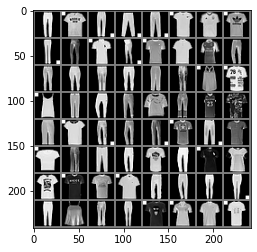

In [ ]:
dataiter = iter(trainloader)
images,labels = dataiter.next()
matplotlib_imshow(torchvision.utils.make_grid(images))

In [ ]:
class Li_Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,10)

  def forward(self,x,beta):
    #flattening the input tensor
    x=x.view(x.shape[0],-1)
    x=self.fc1(x)
    x=F.log_softmax(x,dim=1)

    return x

In [ ]:
class ShLi_Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,256)
    self.fc2 = nn.Linear(256,10)

  def forward(self,x,beta):
    #flattening the input tensor
    x=x.view(x.shape[0],-1)
    x=self.fc1(x)
    x=F.log_softmax(self.fc2(x),dim=1)

    return x


In [ ]:
class ShNLi_Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,256)
    self.fc2 = nn.Linear(256,10)

  def forward(self,x,beta):
    #flattening the input tensor
    x=x.view(x.shape[0],-1)
    x=F.relu(self.fc1(x))
    x=F.log_softmax(self.fc2(x),dim=1)

    return x


In [ ]:
class DeLi_Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,10)

  def forward(self,x,beta):
    #flattening the input tensor
    x=x.view(x.shape[0],-1)
    x=self.fc1(x)
    x=self.fc2(x)
    x=self.fc3(x)
    x=F.log_softmax(self.fc4(x),dim=1)

    return x


In [ ]:
# #@title NTK
# #install JAX on CPU by running
# !pip install jax jaxlib --upgrade
# #Once JAX is installed install Neural Tangents by running
# !pip install neural-tangents

In [ ]:
class DLGN_Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1_gt = nn.Linear(784,256)
    self.fc2_gt = nn.Linear(256,128)
    self.fc3_gt = nn.Linear(128,64)
    self.fc4_gt = nn.Linear(64,10)

    self.fc1_wt = nn.Linear(784,256)
    self.fc2_wt = nn.Linear(256,128)
    self.fc3_wt = nn.Linear(128,64)
    self.fc4_wt = nn.Linear(64,10)

   
    self.galu = nn.Sigmoid()


  def forward(self, x, beta):
    import numpy as np
    x_gt=x.view(x.shape[0],-1)
    x_wt = torch.ones(x_gt.shape).float()  #x_wt = 1 is the input for bottom weight network
    ## 1st Block
    x_gt=self.fc1_gt(x_gt)  #x_gt is for top gate network
    g1=self.galu(beta*x_gt)
    x_wt=self.fc1_wt(x_wt)
    x_wt=g1*x_wt

    ## 2nd Block
    x_gt=self.fc2_gt(x_gt)
    g2=self.galu(beta*x_gt)
    x_wt=self.fc2_wt(x_wt)
    x_wt=g2*x_wt

    ## 3rd Block
    x_gt=self.fc3_gt(x_gt)
    g3=self.galu(beta*x_gt)
    x_wt=self.fc3_wt(x_wt)
    x_wt=g3*x_wt
    
    ## 4th Block
    x_wt=self.fc4_wt(x_wt)
    x_wt=F.log_softmax(x_wt,dim=1)



    return x_wt

**DNN Architecture**

In [ ]:
#Class for the model and subclassing nn.Module to use the layers available
class DeNLi_Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,10)

  def forward(self,x,beta):
    #flattening the input tensor
    x=x.view(x.shape[0],-1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=F.relu(self.fc3(x))
    x=F.log_softmax(self.fc4(x),dim=1)

    return x


In [ ]:
if model_name == 'LinearModel':
  model = Li_Model().to(device)
if model_name == 'ShallowLinearModel':
  model = ShLi_Model().to(device)  
if model_name == 'ShallownonLinearModel':
  model = ShNLi_Model().to(device)
if model_name == 'DeepLinearModel':
  model = DeLi_Model().to(device)
if model_name == 'DLGN':
  model = DLGN_Model().to(device)
if model_name == 'DeepnonLinearModel':
  model = DeNLi_Model().to(device) 

**Loss function and optimizer**

In [ ]:
#metric for loss function
criterion = nn.NLLLoss()
#selecting optimizer
if optimizer_name == 'SGD':
  optimizer = optim.SGD(model.parameters(), lr=learning_rate)
if optimizer_name == 'Adam':
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Gradient computation(optional)

In [ ]:
# images,labels = iter(trainloader).next()
# log_ps = model(images.to(device))
# loss = criterion(log_ps,labels.to(device))
# loss.backward()
# print(model.fc1.weight.grad)

**Training Loop**

In [ ]:
max_epoch =0
max_acc =0
for e in range(epochs):
  running_loss = 0
  model.train()
  for images,labels in trainloader:
    log_ps = model(images.to(device),beta)
    loss = criterion(log_ps,labels.to(device))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  else:
    print(f"Epoch[{e+1}/{epochs}]: Training loss:{running_loss/1000}",end=" ")

    #evaluation
    model.eval()
    with torch.no_grad():
      total = 0
      correct = 0
      for images,labels in testloader:
        log_ps = model(images.to(device),beta).cpu()
        max_index = torch.argmax(log_ps,dim=1)
        total+=labels.numel()
        correct+=sum(max_index==labels).item()
      print(f"Test Accuracy {correct/total*100:.2f}")
      if((correct/total*100)>max_acc):
        max_acc = (correct/total*100)
        max_epoch = e+1

Epoch[1/100]: Training loss:0.053640256466344 Test Accuracy 98.05
Epoch[2/100]: Training loss:0.008275335708633065 Test Accuracy 98.45
Epoch[3/100]: Training loss:0.006205658453982323 Test Accuracy 98.65
Epoch[4/100]: Training loss:0.005400020991452039 Test Accuracy 98.65
Epoch[5/100]: Training loss:0.004974068391486071 Test Accuracy 98.80
Epoch[6/100]: Training loss:0.004704948373138905 Test Accuracy 98.85
Epoch[7/100]: Training loss:0.004433169997180812 Test Accuracy 98.85
Epoch[8/100]: Training loss:0.004248120262927841 Test Accuracy 98.80
Epoch[9/100]: Training loss:0.00402999963669572 Test Accuracy 98.95
Epoch[10/100]: Training loss:0.003878624402685091 Test Accuracy 99.00
Epoch[11/100]: Training loss:0.0037961686748603824 Test Accuracy 99.10
Epoch[12/100]: Training loss:0.0037383549432852305 Test Accuracy 99.05
Epoch[13/100]: Training loss:0.003620531680411659 Test Accuracy 99.15
Epoch[14/100]: Training loss:0.0035272191133117305 Test Accuracy 99.00
Epoch[15/100]: Training loss:0

In [ ]:
print(max_acc)
print(max_epoch)

99.3
78


In [ ]:
##RESULTS
#30 Epochs
#ShallowLinearModel(Model with only 1 linear layer containing 256 hidden nodes): 84.59 (20)
#ShallownonLinearModel(Model with only 1 non linear layer containing 256 hidden nodes): 87.67 (30)
#DeepLinearModel(Model with only 3 linear layer containing 256,128,64 hidden nodes): 84.73 (19)
#DeepnonLinearModel(Model with only 3 non linear layer containing 256,128,64 hidden nodes): 88.10(27)

#100 Epochs
#LinearModel(Model with only input and output): 84.64 (91)
#ShallowLinearModel(Model with only 1 linear layer containing 256 hidden nodes): 84.73 (87)
#ShallownonLinearModel(Model with only 1 non linear layer containing 256 hidden nodes): 89.32 (87)
#DeepLinearModel(Model with only 3 linear layer containing 256,128,64 hidden nodes): 84.42(79)
#DLGN(DLGN Model with only 3 linear layer containing 256,128,64 hidden nodes) 89.15(97)
#DeepnonLinearModel(Model with only 3 non linear layer containing 256,128,64 hidden nodes): 89.21(91)

In [ ]:
#run for DLGN and Linear models
#2 classes
#'T-shirt/top' --> top 4x4 50% data,'Trouser' --> bottom 4x4 50% data

In [ ]:
#100 Epochs
#2 Classes
#LinearModel(Model with only input and output):  98.80(96)
#ShallowLinearModel(Model with only 1 linear layer containing 256 hidden nodes):  98.90(63)
#ShallownonLinearModel(Model with only 1 non linear layer containing 256 hidden nodes):  99.10(71)
#DeepLinearModel(Model with only 3 linear layer containing 256,128,64 hidden nodes): 98.85(33)
#DLGN(DLGN Model with only 3 linear layer containing 256,128,64 hidden nodes) 99.30(35)
#DeepnonLinearModel(Model with only 3 non linear layer containing 256,128,64 hidden nodes): 99.10(54)

In [ ]:
#100 Epochs
#'T-shirt/top' --> top 4x4 50% data,'Trouser' --> bottom 4x4 50% data
#only train
#2 Classes
#LinearModel(Model with only input and output):  98.75(42)
#ShallowLinearModel(Model with only 1 linear layer containing 256 hidden nodes):  98.65(28)
#ShallownonLinearModel(Model with only 1 non linear layer containing 256 hidden nodes):  98.75(71)
#DeepLinearModel(Model with only 3 linear layer containing 256,128,64 hidden nodes): 98.60(35)
#DLGN(DLGN Model with only 3 linear layer containing 256,128,64 hidden nodes) 99.05(39)
#DeepnonLinearModel(Model with only 3 non linear layer containing 256,128,64 hidden nodes): 99.00(81)

In [ ]:
#100 Epochs
#'T-shirt/top' --> top 4x4 50% data,'Trouser' --> bottom 4x4 50% data
#both train and test
#2 Classes
#LinearModel(Model with only input and output):  99.30(83)
#ShallowLinearModel(Model with only 1 linear layer containing 256 hidden nodes):  99.20(29)
#ShallownonLinearModel(Model with only 1 non linear layer containing 256 hidden nodes):  99.30(84)
#DeepLinearModel(Model with only 3 linear layer containing 256,128,64 hidden nodes): 99.2(13)
#DLGN(DLGN Model with only 3 linear layer containing 256,128,64 hidden nodes) 99.45(50)
#DeepnonLinearModel(Model with only 3 non linear layer containing 256,128,64 hidden nodes): 99.3(78)